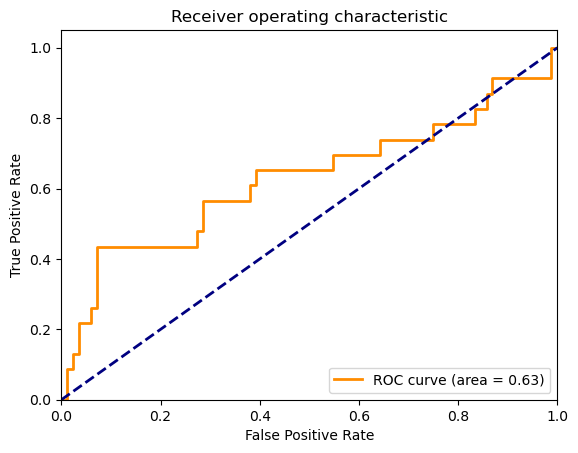

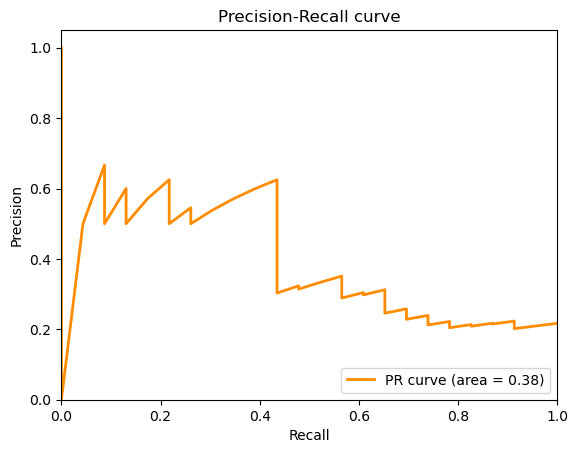

roc_auc=0.6278467908902692
pr_auc=0.37640322747395716


In [9]:
import pandas as pd
import pathlib
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt


csv_file = pathlib.Path('/Users/eugene/OneDrive - Nexus365/PhD/4. Rotation 2/panddascore/training_results/2022_09_15-04_57_21_PM}/output_labels.csv')
# csv_file = pathlib.Path('/dls/labxchem/data/2018/lb18145-80/processing/analysis/eugene/pandda_score/training_results/2022_09_20-07_29_42_PM/output_labels.csv')

df = pd.read_csv(csv_file)
pred_probabilities = df['pred_probabilities'].tolist()
df_ground_truth_labels = df['labels_remodelled_yes_no'].tolist()

fpr, tpr, thresholds = roc_curve(df_ground_truth_labels, pred_probabilities)
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(df_ground_truth_labels, pred_probabilities)
pr_auc = auc(recall, precision)

#plot roc curves
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#plot precision recall curves
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower right")
plt.show()


print(f'{roc_auc=}')
print(f'{pr_auc=}')

